In [85]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.feature_selection import SelectKBest, chi2

In [86]:
heart_attack_pred = pd.read_csv("heart_attack_prediction_dataset.csv").drop(columns=["Patient ID", "Country", "Continent", "Hemisphere"])
heart_attack_pred.columns = map(str.lower, heart_attack_pred)
heart_attack_pred.rename(columns={'heart attack risk': 'har'}, inplace=True)
heart_attack_pred.head()

,age,sex,cholesterol,blood pressure,heart rate,diabetes,family history,smoking,obesity,alcohol consumption,...,previous heart problems,medication use,stress level,sedentary hours per day,income,bmi,triglycerides,physical activity days per week,sleep hours per day,har
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,1,0,6,1.514821,160555,21.809144,231,1,5,0


In [87]:
heart_attack_pred['sex'] = heart_attack_pred['sex'].str.lower()

In [88]:
heart_attack_pred['bmi'] = round(heart_attack_pred['bmi'])
heart_attack_pred[['systolic blood pressure', 'diastolic blood pressure']] = heart_attack_pred['blood pressure'].str.split('/', expand=True)
heart_attack_pred = heart_attack_pred.drop(columns=['blood pressure', 'physical activity days per week'])
heart_attack_pred['systolic blood pressure'] = pd.to_numeric(heart_attack_pred['systolic blood pressure'])
heart_attack_pred['diastolic blood pressure'] = pd.to_numeric(heart_attack_pred['diastolic blood pressure'])

In [89]:
# Import label encoder 
from sklearn import preprocessing 
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
heart_attack_pred['sex']= label_encoder.fit_transform(heart_attack_pred['sex']) 
  
heart_attack_pred['sex'].unique() 
heart_attack_pred['diet']= label_encoder.fit_transform(heart_attack_pred['diet']) 
  
heart_attack_pred['diet'].unique() 

array([0, 2, 1])

In [90]:
for col in heart_attack_pred.columns:
    print(col)

age
sex
cholesterol
heart rate
diabetes
family history
smoking
obesity
alcohol consumption
exercise hours per week
diet
previous heart problems
medication use
stress level
sedentary hours per day
income
bmi
triglycerides
sleep hours per day
har
systolic blood pressure
diastolic blood pressure


In [91]:
# split dataset in features and target variable
feature_cols = ['age', 'sex', 'cholesterol', 'heart rate', 'diabetes', 'family history', 'smoking', 'obesity',
                'alcohol consumption', 'exercise hours per week', 'diet', 'previous heart problems',
                'medication use', 'stress level', 'sedentary hours per day', 'income', 'bmi', 'triglycerides',
                'sleep hours per day', 'systolic blood pressure', 'diastolic blood pressure']

X = heart_attack_pred[feature_cols] # Features
y = heart_attack_pred.har # Target variable

# import library
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

X = x_smote
y = y_smote

selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X, y)

selected_features_idx = selector.get_support(indices=True)
selected_features_name = X.columns[selected_features_idx]

X = X_new

print(X)

Original dataset shape Counter({0: 5624, 1: 3139})
Resample dataset shape Counter({0: 5624, 1: 5624})
[[2.08000e+02 0.00000e+00 0.00000e+00 ... 0.00000e+00 2.61404e+05
  2.86000e+02]
 [3.89000e+02 1.00000e+00 1.00000e+00 ... 0.00000e+00 2.85768e+05
  2.35000e+02]
 [3.24000e+02 1.00000e+00 0.00000e+00 ... 1.00000e+00 2.35282e+05
  5.87000e+02]
 ...
 [3.46000e+02 1.00000e+00 0.00000e+00 ... 1.00000e+00 8.20410e+04
  2.37000e+02]
 [2.02000e+02 0.00000e+00 0.00000e+00 ... 1.00000e+00 9.48140e+04
  6.40000e+02]
 [2.20000e+02 1.00000e+00 0.00000e+00 ... 1.00000e+00 3.09320e+04
  3.65000e+02]]


In [92]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [93]:
# instantiate the model (using the default parameters)
model = svm.SVC(kernel="sigmoid")

# fit the model with data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [94]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[697, 720],
       [701, 694]], dtype=int64)

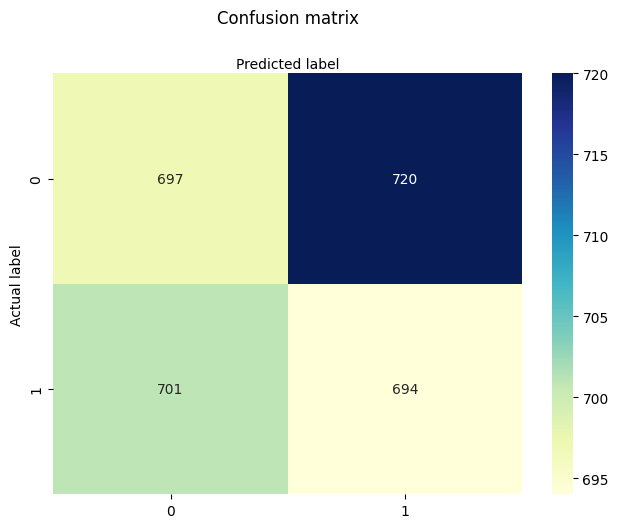

In [95]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [96]:
from sklearn.metrics import classification_report
target_names = ['no har risk', 'har risk']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 no har risk       0.50      0.49      0.50      1417
    har risk       0.49      0.50      0.49      1395

    accuracy                           0.49      2812
   macro avg       0.49      0.49      0.49      2812
weighted avg       0.49      0.49      0.49      2812

